# Segment covid 19 from the lungs
Uses Otsu Multi Thresholding algorithm, BinaryOpeningByReconstruction, and BinaryClosingByReconstruction

Uses material from https://github.com/SimpleITK/SimpleITK

Input: segmented lung 3D image

Output: covid 19 segmentation mask

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

import SimpleITK as sitk
from myshow import myshow, myshow3d
import nibabel as nib
import numpy as np

In [2]:
input_path = "./output_data_segmented_for_registration/2.000000-ROUTINE CHEST NON-CON-70218.nii"
output_path = "./semi_auto_output_data/covid_seg_mask/2.000000-ROUTINE CHEST NON-CON-70218.nii"

In [3]:
img_T1 = sitk.ReadImage(input_path)

img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)

myshow3d(img_T1)

interactive(children=(IntSlider(value=100, description='z', max=200), Output()), _dom_classes=('widget-interac…

In [4]:
otsu_filter = sitk.OtsuMultipleThresholdsImageFilter()
otsu_filter.SetNumberOfThresholds(2)
seg = otsu_filter.Execute(img_T1)
myshow(sitk.LabelOverlay(img_T1_255, seg), "Otsu Multi Thresholding overlayed on Image")
myshow(seg, "Otsu Multi Thresholding")
print(otsu_filter.GetThresholds())

interactive(children=(IntSlider(value=100, description='z', max=200), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=100, description='z', max=200), Output()), _dom_classes=('widget-interac…

(-1482.7642784118652, -379.6781005859375)


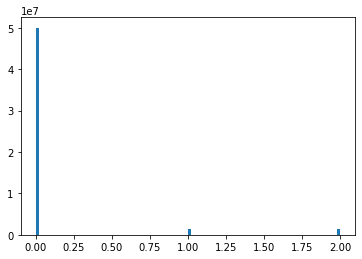

interactive(children=(IntSlider(value=100, description='z', max=200), Output()), _dom_classes=('widget-interac…

In [5]:
plt.figure()
plt.hist(sitk.GetArrayViewFromImage(seg).flatten(), bins=100)
plt.show()
myshow(seg, "Binary Thresholding")

In [6]:
seg = sitk.BinaryThreshold(
    seg, lowerThreshold=0.75, upperThreshold=1.25, insideValue=0, outsideValue=1
)


In [7]:
cleaned_thresh_img = sitk.BinaryOpeningByReconstruction(
    seg, [5, 5, 5]
)
cleaned_thresh_img = sitk.BinaryClosingByReconstruction(
    cleaned_thresh_img, [5, 5, 5]
)

myshow(sitk.LabelOverlay(img_T1_255, cleaned_thresh_img), "Otsu Multi Thresholding + Bianry Reconstruction Overlayed On Image")


interactive(children=(IntSlider(value=100, description='z', max=200), Output()), _dom_classes=('widget-interac…

In [8]:
myshow3d(cleaned_thresh_img)


interactive(children=(IntSlider(value=100, description='z', max=200), Output()), _dom_classes=('widget-interac…

In [9]:
sitk.WriteImage(cleaned_thresh_img, output_path)